# Preliminaries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_0 = np.eye(2)
tau_x = np.array([[0, 1], [1, 0]], dtype=complex)
tau_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau_z = np.array([[1, 0], [0, -1]], dtype=complex)

In [4]:
# MCI Constants
tp, mp = 0, 0.1
hp_constant = mp*(np.kron(tau_z,sigma_z)+ np.kron(tau_z,I2)+np.kron(tau_0,sigma_z)+np.kron(tau_x,sigma_z)+np.kron(tau_y,I2))
hp = 2*tp*np.cos(kx)*np.kron(tau_y,sigma_y)

# Dispersion E

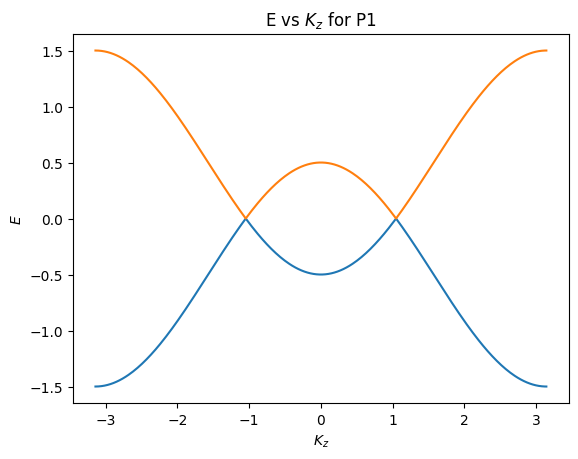

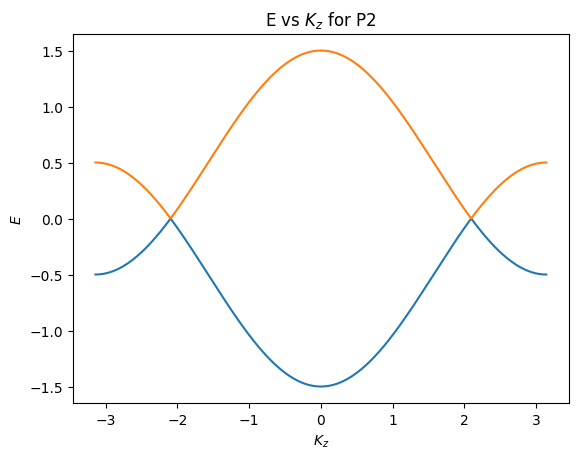

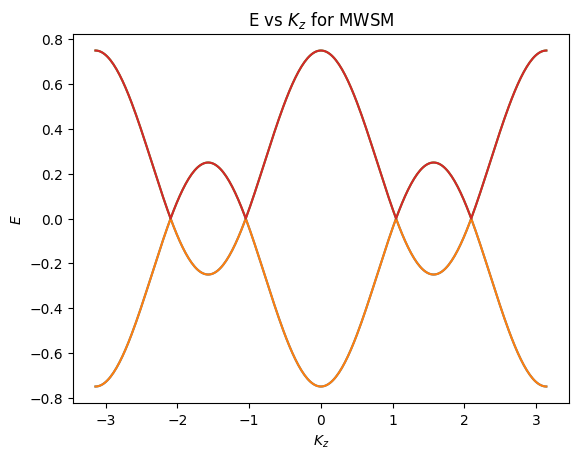

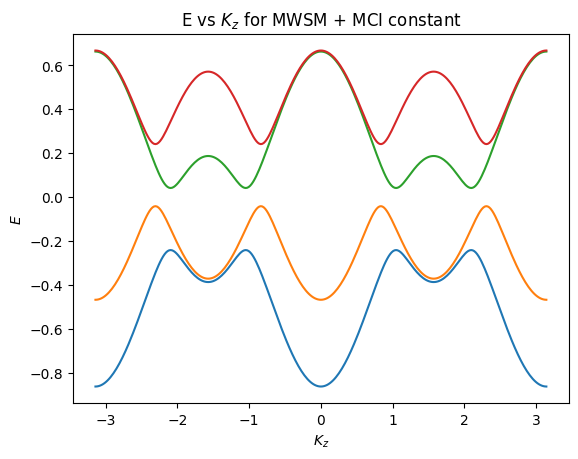

In [77]:
#Dispersion E for child hamiltonian from Parents 1 and 2 (below)  

# Parameters
mp, tp = 0.1, 0
g1, g2 = 0.5, -0.5

kx, ky = 0, 0
kzs = np.linspace(-np.pi,np.pi, 301)


t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

hp_constant = mp*(np.kron(tau_z,sigma_z)+ np.kron(tau_z,I2)+np.kron(tau_0,sigma_z)+np.kron(tau_x,sigma_z)+np.kron(tau_y,I2))
hp = tp*np.cos(kx)*np.kron(tau_y,sigma_y)

# Parent WSM Hamiltonians 
evals_P1 = []
evals_P2 = []
evals_child = []
evals_child_broken = []
for kz in kzs:
    H_P1 = t_matrix[0][0]*np.sin(kx)*tau_x+t_matrix[1][0]*np.sin(ky)*tau_y+t_matrix[2][0]*(2+g1-np.cos(kx)-np.cos(ky)-np.cos(kz))*tau_z
    H_P2 = -t_matrix[0][1]*np.sin(kx)*sigma_x+t_matrix[1][1]*np.sin(ky)*sigma_y-t_matrix[2][1]*(2+g2-np.cos(kx)-np.cos(ky)-np.cos(kz))*sigma_z

    H_child = np.kron (H_P1, H_P2)
    H_child_broken = np.kron (H_P1, H_P2)+hp_constant

    eigenvals_P1 = np.linalg.eigvalsh(H_P1)
    eigenvals_P2 = np.linalg.eigvalsh(H_P2)
    eigenvals_child = np.linalg.eigvalsh(H_child)
    eigenvals_child_broken = np.linalg.eigvalsh(H_child_broken)
    evals_P1.append (eigenvals_P1)
    evals_P2.append (eigenvals_P2)
    evals_child.append (eigenvals_child)
    evals_child_broken.append(eigenvals_child_broken)
    

plt.plot (kzs, evals_P1)
plt.xlabel ('$K_z$')
plt.ylabel ('$E$')
plt.title ("E vs $K_z$ for P1")
plt.show ()
plt.plot (kzs, evals_P2)
plt.xlabel ('$K_z$')
plt.ylabel ('$E$')
plt.title ("E vs $K_z$ for P2")
plt.show ()
plt.plot (kzs, evals_child)
plt.xlabel ('$K_z$')
plt.ylabel ('$E$')
plt.title ("E vs $K_z$ for MWSM")
plt.show ()
plt.plot (kzs, evals_child_broken)
plt.xlabel ('$K_z$')
plt.ylabel ('$E$')
plt.title ("E vs $K_z$ for MWSM + MCI constant")
plt.show ()

# Slab spectra

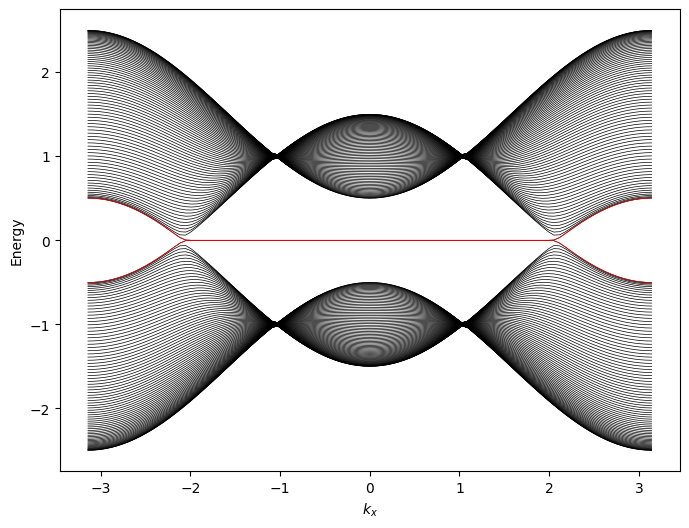

In [78]:
mp = 0.1
tp = 0

g1 = -0.5
g2 = 0.5

t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

#OBC in x direction
L = 80
kzs = np.linspace(-np.pi,np.pi, 99)
ky = 0

#Slab spectra 
#Hamiltonian and diagonalization
P1_eigvals_oc_vs_kz = []
for kz in kzs:
    H_P10 = t_matrix[1][0]*np.sin(ky)*tau_y+t_matrix[2][0]*(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    V_P10 = t_matrix[0][0]*(-1j/2)*tau_x+t_matrix[2][0]*(1/2)*tau_z
  
    HP1_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
        if i < L - 1:
            HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
            HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
    
    P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)      
    P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc)


P1_eigvals_oc_vs_kz = np.array(P1_eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in P1_eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P1_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()


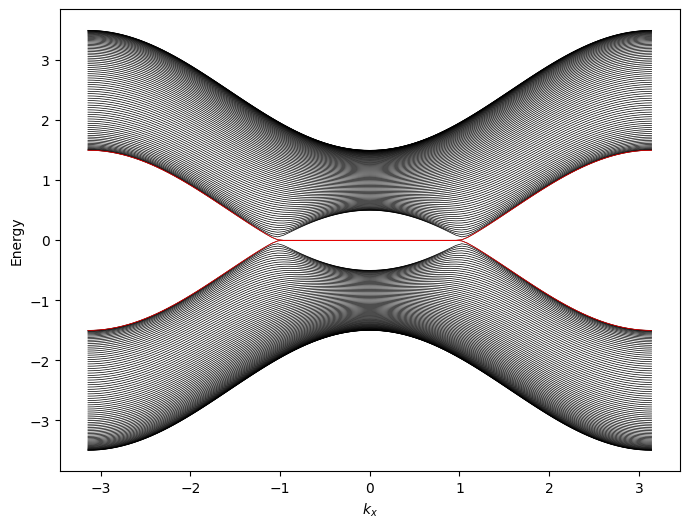

In [79]:
# Parameters
mp = 0.1
tp = 0

g1 = -0.5
g2 = 0.5

t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

#OBC in x direction
L = 80
kzs = np.linspace(-np.pi,np.pi, 99)
ky = 0


#Slab spectra
#Hamiltonian and diagonalization
P2_eigvals_oc_vs_kz = []
for kz in kzs:
    H_P20 = t_matrix[1][1]*np.sin(ky)*sigma_y+t_matrix[2][1]*(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    V_P20 = t_matrix[0][1]*(-1j/2)*sigma_x+t_matrix[2][1]*(1/2)*sigma_z

    HP2_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
        if i < L - 1:
            HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
            HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T

   
    P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)      
    P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc)


P2_eigvals_oc_vs_kz = np.array(P2_eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in P2_eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P2_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()

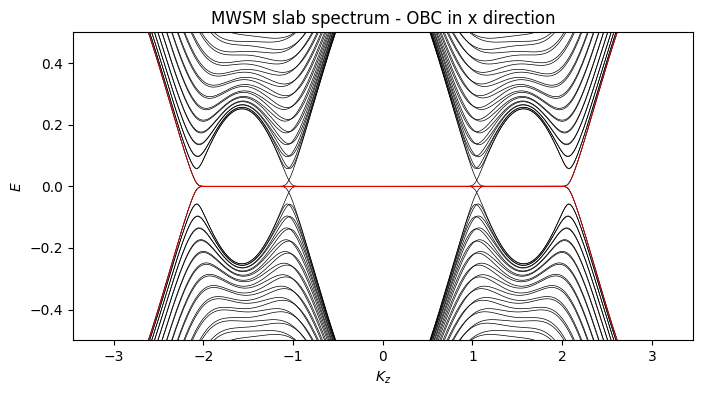

In [127]:
#Slab spectra - OBC in x direction
#Parameters

L = 80
kzs = np.linspace(-np.pi,np.pi, 301)
ky = 0

g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum - OBC in x direction')
ax.set_ylim (-0.5,0.5)

plt.show()

# Fermi arcs

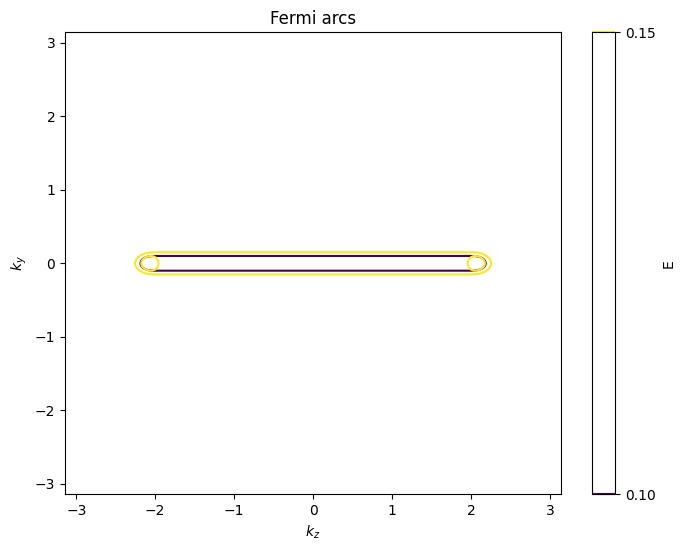

In [81]:
#Periodic-open
# Parameters
L = 40
g1, g2, mp = -0.5, 0.5, 0.1

kzs = np.linspace(-np.pi,np.pi, 301)
kys = np.linspace(-np.pi,np.pi, 301)
YY, ZZ = np.meshgrid (kys, kzs)

P1_eigvals_oc_vs_kz = []
# Hamiltonian
for kz in kzs:
    for ky in kys:
        H_P10 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
        V_P10 = (-1j/2)*tau_x+(1/2)*tau_z
      
        HP1_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
            if i < L - 1:
                HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
                HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
        
        P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)      
        P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc.real)

arr = np.array(P1_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 2*L)
#Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [0.1,0.15] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

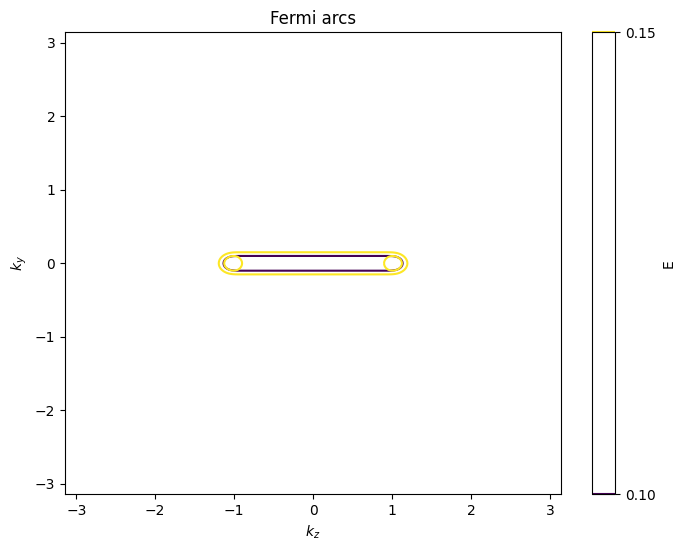

In [82]:
#Periodic-open
# Parameters
L = 40
g1, g2, mp = -0.5, 0.5, 0.1

kzs = np.linspace(-np.pi,np.pi, 301)
kys = np.linspace(-np.pi,np.pi, 301)
YY, ZZ = np.meshgrid (kys, kzs)

P2_eigvals_oc_vs_kz = []
# Hamiltonian
for kz in kzs:
    for ky in kys:
        H_P20 = np.sin(ky)*sigma_y+(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
        V_P20 = (-1j/2)*sigma_x+(1/2)*sigma_z
    
        HP2_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
            if i < L - 1:
                HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
                HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T
       
        P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)      
        P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc.real)

arr = np.array(P2_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 2*L)
#Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [0.1,0.15] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

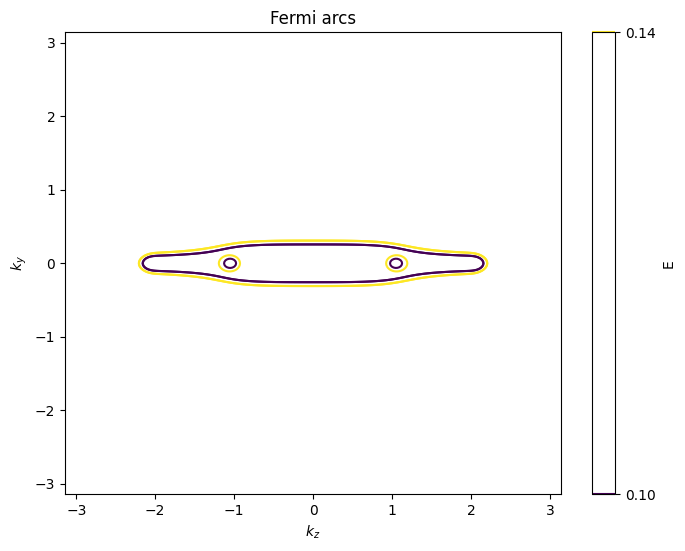

In [121]:
#Periodic-open
# Parameters
L = 30
g1, g2, mp = -0.5, 0.5, 0.1

kzs = np.linspace(-np.pi,np.pi, 301)
kys = np.linspace(-np.pi,np.pi, 301)
YY, ZZ = np.meshgrid (kys, kzs)


child_eigvals_oc_vs_kz = []
for kz in kzs:
    for ky in kys:
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
        
        H_child = np.zeros((4*L, 4*L), dtype=complex)
        for i in range(L):
            H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
            if i < L - 1:
                H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
                H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
            if i < L - 2:
                H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
                H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T
    
    
        eigenvals_oc_child = np.linalg.eigvalsh(H_child)
        child_eigvals_oc_vs_kz.append(eigenvals_oc_child.real)

arr = np.array(child_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 4*L)

#Plot
plt.figure(figsize=(8,6))
for band in range (4*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [0.1,0.14])
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

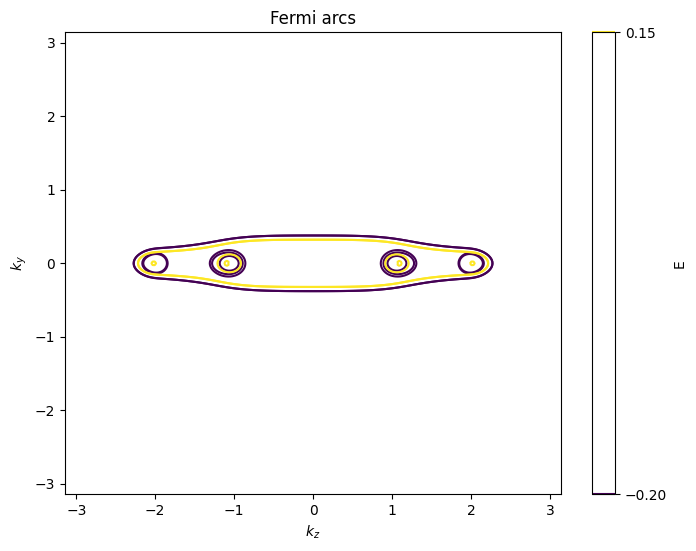

In [126]:
#Plot
plt.figure(figsize=(8,6))
for band in range (4*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [-0.2,0.15])
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

# Landau levels

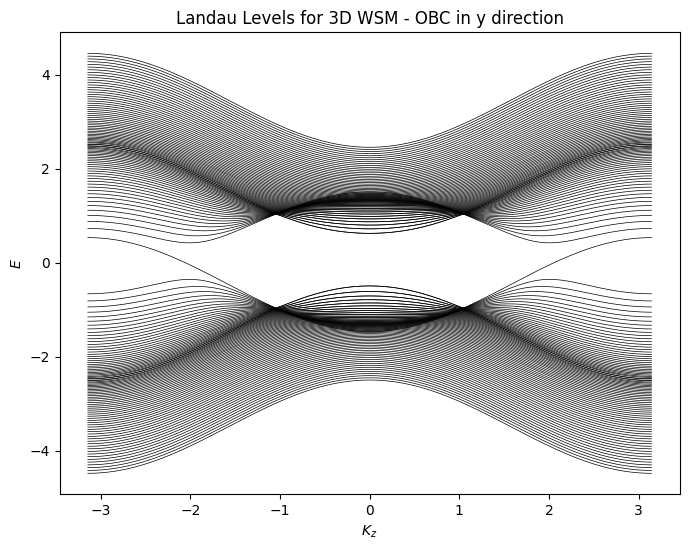

In [65]:
# Parameters
L = 80
B= 2*np.pi/L

kzs =np.linspace(-np.pi, np.pi, 501)
kx, ky = 0,0

#Hamiltonian and diagonalization
P1_eigvals_oc_vs_kz = []
for kz in kzs:
    HP1_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_P10 = np.sin(ky+B*i)*tau_y+(2+g1-np.cos(ky+B*i)-np.cos(kz))*tau_z
        V_P10 = (-1j/2)*tau_x+(1/2)*tau_z
            
        HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
        if i < L - 1:
            HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
            HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
        else:
            HP1_open[2*i:2*i+2, 0:2] = V_P10
            HP1_open[0:2, 2*i:2*i+2] = V_P10.conj().T
    
    P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)
    P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc)

P1_eigvals_oc_vs_kz = np.array(P1_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,6))
for band in P1_eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM - OBC in y direction')

#ax.set_xlim (1,5.5)
#ax.set_ylim (-2,2)
#ax.plot(kzs, P1_eigvals_oc_vs_kz[80], color='red', linewidth =0.5)

plt.show()


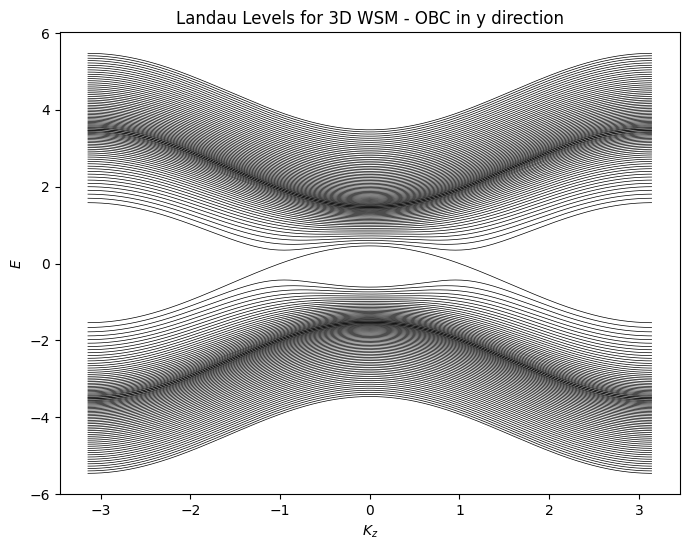

In [74]:
# Parameters
L = 80
B= 2*np.pi/L

kzs =np.linspace(-np.pi, np.pi, 501)
kx, ky = 0,0

#Hamiltonian and diagonalization
P2_eigvals_oc_vs_kz = []
for kz in kzs:
    HP2_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_P20 = np.sin(ky-B*i)*sigma_y+(2+g2-np.cos(ky-B*i)-np.cos(kz))*sigma_z
        V_P20 = (-1j/2)*sigma_x+(1/2)*sigma_z

        HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
        if i < L - 1:
            HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
            HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T
        else:
            HP2_open[2*i:2*i+2, 0:2] = V_P20
            HP2_open[0:2, 2*i:2*i+2] = V_P20.conj().T
    
    P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)
    P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc)

P2_eigvals_oc_vs_kz = np.array(P2_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,6))
for band in P2_eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM - OBC in y direction')

#ax.set_xlim (1,5.5)
#ax.set_ylim (-2,2)
#ax.plot(kzs, P1_eigvals_oc_vs_kz[80], color='red', linewidth =0.5)

plt.show()


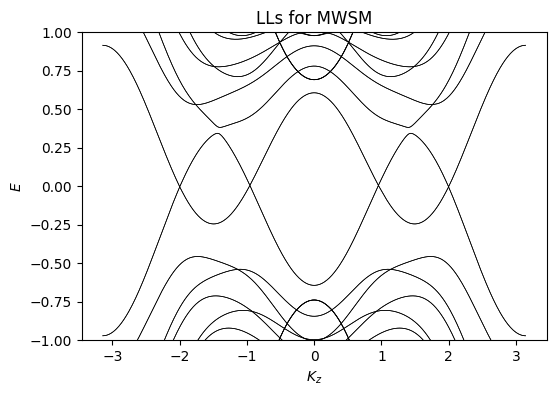

In [55]:
#Parameters
L = 80
kzs = np.linspace(-np.pi,np.pi, 501)
ky = 0

B= 2*np.pi/L
g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky+2*B*i)*tau_y+(2+g1-np.cos(ky+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky+2*B*i)*sigma_y-(2+g2-np.cos(ky+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky+2*B*(i+0.5))*tau_y+(2+g1-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky+2*B*(i+0.5))*sigma_y-(2+g2-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM')
ax.set_ylim (-1,1)

plt.show()

# MCI Costant

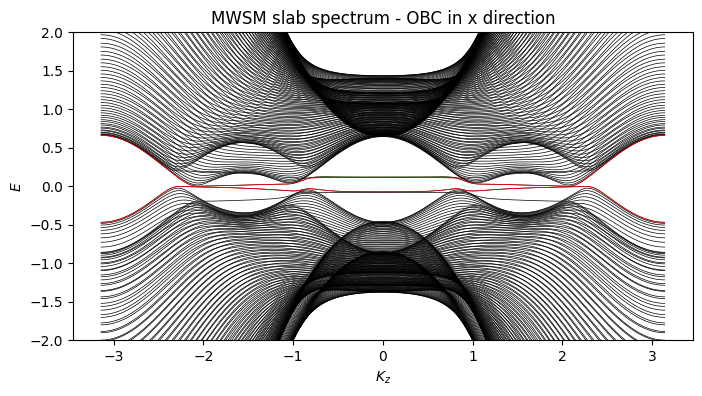

In [120]:
#Slab spectra - OBC in x direction
#Parameters

L = 80
kzs = np.linspace(-np.pi,np.pi, 301)
ky = 0

g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum + MCI constant')
ax.set_ylim (-2,2)

plt.show()

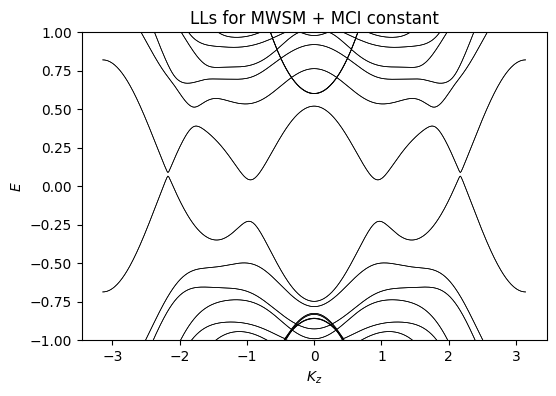

In [57]:
#Parameters
L = 80
kzs = np.linspace(-np.pi,np.pi, 501)
ky = 0

B= 2*np.pi/L
g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky+2*B*i)*tau_y+(2+g1-np.cos(ky+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky+2*B*i)*sigma_y-(2+g2-np.cos(ky+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky+2*B*(i+0.5))*tau_y+(2+g1-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky+2*B*(i+0.5))*sigma_y-(2+g2-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM + MCI constant')
ax.set_ylim (-1,1)

plt.show()